# Tips and Tricks (WIP)

## in development:
### Docs
**Command + Shift + R** : Reload page in chrome, when readthedocs shows old version because of caching problems
### Development
When the lastest main version of manim is instaled via `pip install .` ,  there might be problems with jupyter notebooks, that are not updated to the latest version. This is because there are some packages in the virtual environment that point to an older manim version. To solve this problem, simply delete the folders `0.6.0-dist` and `manim` from the  `site-packages`folder in your virtual environment. This problem should not occur when installing the latest manim via `poetry install`.




In [ ]:
def show_val(vals, name):
    print("Name:", name, "val:", vals[name]) 

a = 'hello'
bb = "z"
a__name__

### Shortcuts
* Quickly open a jupyter notebook in the manim environment:  
   `source projects/manimenv/bin/activate && jupyter lab`
   

## Chapter Snippets

In [ ]:
import manim
from manim import *

### FFMPEG 

For some videos, it might be wanted to have the first frame as an image, for example 
in while post-processing in a video edior.
This can be accived with the following script, which will batch-process all videos in the Downloads folder and extract all first frames to
the folder "Downloads/processed"

In [ ]:
from pathlib import Path
import os
suffix = ".mp4"
input_path= Path.home() / "Downloads/"
file_paths= [subp for subp in input_path.rglob('*') if  suffix == subp.suffix]
if len(file_paths) == 0:
        raise ValueError("No videos in folder")
file_paths.sort()
print(file_paths)
output_path =  Path.home() / "Downloads/processed"
output_path.mkdir(parents=True, exist_ok=True)
print(output_path)

for file_p in file_paths:
    input = str(file_p)
    output = str(  output_path / file_p.name)
    output = output[:-4] # delete the ending
    print(output)
    command = f"ffmpeg -i {input} -vframes 1 {output}.png"
    os.system(command)

## Dummy

In [ ]:
import manim
from manim import *

## Adding Mobjects without self.add()

In [ ]:
%%manim  -v WARNING -ql  --disable_caching ABCCD

class ABCCD(Scene):
    def construct(self):
        tex  = Tex(r"$dk_x dk_y = |\mu| d\mu d\phi$").scale(3)
        tex2 = Tex(r"$\begin{pmatrix} k_x \\ k_y  \end{pmatrix}$")
        tex3 = Tex(r"$\mu \begin{pmatrix} \cos \phi \\ \sin \phi  \end{pmatrix}$")
        
        gr = VGroup()
        all_variables = dir()
        for name in all_variables:
            if not name.startswith('__'):
                myvalue = eval(name)
                if isinstance(myvalue, Tex):
                    gr.add(myvalue)
        gr.arrange(DOWN)
        self.add(gr)
            

## Aligining and coloring latex formulas

In [ ]:
%%manim  -v WARNING -qh  -s --progress_bar None  --disable_caching Ingreds2
BLUE="#09B0EC"
ORANGE="#F87D50"


class Ingreds2(Scene):
    def construct(self):
        d1,d2,d3,d4= Dot(),Dot(),Dot(),Dot()
        dots= VGroup(d1,d2,d3,d4).arrange(DOWN, buff=1.5).to_edge(LEFT, buff=1).shift(0.2*DOWN)
        d3.shift(DOWN*0.15)

        title = Tex(r"From " , r"$p(s,\phi)$" , " to " , r"$f(x,y)$" , r" ? \\ Why do we have to filter with " , r"$|\omega|$ ","? ").to_edge(UP, buff=1)
        title.set_color_by_tex("f(x,y)", BLUE)
        title.set_color_by_tex("p(s,\phi)", ORANGE)
        title.set_color_by_tex("|\omega|",ORANGE)

        radon_tex = MathTex(r"\text{Radon Transform} ", r"p(s,\phi)",r" =\mathcal{R}\big\{",r" f(x,y) ",r"\big\}").next_to(d1, RIGHT)
        radon_tex.set_color_by_tex("f(x,y)", BLUE)
        radon_tex.set_color_by_tex("p(s,\phi)", ORANGE)
        radon_name= radon_tex.submobjects[0]
        radon_formula= VGroup(*radon_tex.submobjects[1:])


        fourier_name = Tex("Fourier Transform ").next_to(d2, RIGHT)
        fourier_formulaA =MathTex(r"\mathcal{F}_1\big\{ ",r"p(s, \phi)",r" \big\}   = P(",r"\omega",r", \phi)")
        fourier_formulaA.set_color_by_tex("p(s,\phi)", ORANGE)
        fourier_formulaA.set_color_by_tex("\omega", ORANGE)
        fourier_formulaB =MathTex(r"\mathcal{F}_2\big\{",r"f(x,y)",r"\big\} = F(k_x,k_y)").next_to(fourier_formulaA, DOWN, aligned_edge=LEFT)
        fourier_formulaB.set_color_by_tex("f(x,y)", BLUE)
        fourier_formulaALL = VGroup(fourier_formulaA,fourier_formulaB).next_to(fourier_name, RIGHT)
        
        polar_name = Tex("Polar Coordinates").next_to(d3,RIGHT)
        polar_formula = MathTex(r"	\begin{pmatrix} k_x \\ k_y  \end{pmatrix} =  r \begin{pmatrix} \cos \phi \\ \sin \phi  \end{pmatrix}").next_to(polar_name, RIGHT )
        
        slice_name = Tex("Fourier Slice Theorm").next_to(d4,RIGHT)
        
        slice_formula = MathTex(r"\mathcal{F}_1 \big\{",r"p(s, \phi = \phi')",r" \big\} &= \mathcal{F}_2 \big\{ ",r"f(x,y)",r" \big\}  \Big|_{\phi = \phi'} \\")
        slice_formula.next_to(slice_name).shift(DOWN*0.1)
        slice_formula.set_color_by_tex("p(s,\phi)", ORANGE)
        slice_formula.set_color_by_tex("f(x,y)", BLUE)

        self.add(title)
        alltex= VGroup( radon_tex, fourier_name, fourier_formulaALL, polar_name, polar_formula, slice_name,slice_formula).scale(0.8).shift(DOWN*0.5)
        radon_formula.align_to(slice_formula, LEFT)
        fourier_formulaALL.align_to(slice_formula, LEFT)
        polar_formula.align_to(slice_formula, LEFT)
        self.add(alltex)


In [ ]:
!manim render --help

In [ ]:
.next_to(x, DOWN, buff=0.1)

In [6]:
s= Arc(radius=1.0, start_angle=-PI/8, angle=PI,stroke_width=10).scale(4)
funcnames = ["s.get_start()", "s.get_end()", "s.get_midpoint()" ,"s.point_from_proportion(0.3)", "s.get_center()", "s.get_center()", "s.get_top()", "s.get_bottom()", "s.get_corner(DL)"]
COLORS = ["BLUE", "BLUE", "BLUE" , "YELLOW", "ORANGE", "RED","WHITE","WHITE","WHITE"]
funcvals = np.array([eval(el) for el in funcnames])
funcvals= np.round(funcvals,2)
positiondots= Group()
for name, val, color in zip(funcnames,funcvals, COLORS):
    print(f"{name:<{30}}" + f"x = {val[0]:<{6}} y = {val[1]:<{6}} " + color )
    positiondots.add(Dot(val, color= eval(color), radius=0.2))

s.get_start()                 x = 3.58   y = -2.46  BLUE
s.get_end()                   x = -3.81  y = 0.6    BLUE
s.get_midpoint()              x = 1.42   y = 2.77   BLUE
s.point_from_proportion(0.3)  x = 3.3    y = 1.16   YELLOW
s.get_center()                x = 0.04   y = 0.31   ORANGE
s.get_center()                x = 0.04   y = 0.31   RED
s.get_top()                   x = 0.04   y = 3.07   WHITE
s.get_bottom()                x = 0.04   y = -2.46  WHITE
s.get_corner(DL)              x = -3.81  y = -2.46  WHITE


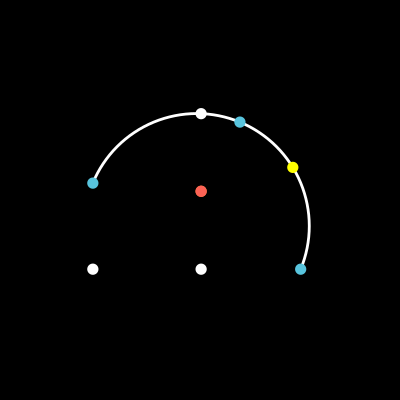

In [7]:
%%manim -v WARNING -r 400,400 -s  --disable_caching Example
class Example(Scene):
    def construct(self):
        self.add(s)
        self.add(positiondots)